In [1]:
import pandas as pd 
import numpy as np
import json
import traceback

In [2]:
df = pd.read_csv("massive_df.csv")
df.rename( columns={'Unnamed: 0':'gene'}, inplace=True )
print(len(df))
df.head(10)

17088


,gene,FDR_Bacillus subtilis 168 Marburg,FDR_nor__p(appB) TSS-150__COL1,FDR_nor__p(appC) TSS-150__COL1,FDR_nor__p(ctaD) TSS+48__COL1,FDR_nor__p(czcD) TSS-150__COL1,FDR_nor__p(hisD) TSS-150__COL1,FDR_nor__p(hisZ) TSS+48__COL1,FDR_nor__p(maeS) TSS-150__COL1,FDR_nor__p(narJ) TSS+48__COL1,...,nlogFDR_nor__p(appB) TSS-150__COL1,nlogFDR_nor__p(appC) TSS-150__COL1,nlogFDR_nor__p(ctaD) TSS+48__COL1,nlogFDR_nor__p(czcD) TSS-150__COL1,nlogFDR_nor__p(hisD) TSS-150__COL1,nlogFDR_nor__p(hisZ) TSS+48__COL1,nlogFDR_nor__p(maeS) TSS-150__COL1,nlogFDR_nor__p(narJ) TSS+48__COL1,nlogFDR_nor__p(yrbE) TSS-150__COL1,nlogFDR_nor__p(yuiB) TSS-150__COL1
0,aacd,0.807914,0.001681,0.005193,5.383604e-07,2.342534e-09,0.010407,NaN,0.001377,0.137076,...,2.774359,2.284618,6.268927,8.630314,1.982658,NaN,2.860944,0.863038,NaN,0.538167
1,aadk,0.709638,0.617119,0.645506,3.035475e-01,2.591140e-01,0.987010,NaN,0.848195,0.890326,...,0.209631,0.190100,0.517773,0.586509,0.005679,NaN,0.071504,0.050451,NaN,0.030092
2,aag,0.915281,0.000580,0.003408,5.005227e-03,2.120556e-03,0.010599,NaN,0.025731,0.348733,...,3.236377,2.467503,2.300576,2.673550,1.974730,NaN,1.589541,0.457507,NaN,0.092829
3,aapa,0.960719,0.153253,0.833211,4.978325e-01,8.765104e-01,0.794778,NaN,0.148395,0.433730,...,0.814591,0.079245,0.302917,0.057243,0.099754,NaN,0.828582,0.362781,NaN,0.087435
4,abba,0.936699,0.781562,0.535397,3.615087e-01,2.352196e-02,0.933760,NaN,0.141479,0.779341,...,0.107037,0.271324,0.441881,1.628526,0.029765,NaN,0.849308,0.108272,NaN,0.184336
5,abfa,0.999910,0.118000,0.627567,0.000000e+00,6.569847e-01,0.327674,NaN,0.327545,0.000000,...,0.928119,0.202340,0.000000,0.182445,0.484558,NaN,0.484729,0.000000,NaN,0.000000
6,abfb,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000
7,abha,0.826151,0.988220,0.997785,7.585856e-01,4.389883e-01,0.692701,NaN,0.771802,0.962037,...,0.005146,0.000963,0.119995,0.357547,0.159454,NaN,0.112494,0.016808,NaN,0.001121
8,abna,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000
9,abnb,0.999910,0.652377,0.583991,8.763684e-01,1.321985e-01,0.330138,NaN,0.894923,0.989082,...,0.185502,0.233594,0.057313,0.878773,0.481304,NaN,0.048214,0.004768,NaN,0.224159


In [3]:
fdr_circuits = df.columns[pd.Series(df.columns).str.startswith('FDR_')].values.tolist()
circuits = [x[4:] for x in fdr_circuits]
circuits

['Bacillus subtilis 168 Marburg',
 'nor__p(appB) TSS-150__COL1',
 'nor__p(appC) TSS-150__COL1',
 'nor__p(ctaD) TSS+48__COL1',
 'nor__p(czcD) TSS-150__COL1',
 'nor__p(hisD) TSS-150__COL1',
 'nor__p(hisZ) TSS+48__COL1',
 'nor__p(maeS) TSS-150__COL1',
 'nor__p(narJ) TSS+48__COL1',
 'nor__p(yrbE) TSS-150__COL1',
 'nor__p(yuiB) TSS-150__COL1']

In [4]:
df = df[df.columns.drop(list(df.filter(regex='flagedgeRremoved_')))]
df = df[df.columns.drop(list(df.filter(regex='nlogFDR_')))]
df.head(10)

,gene,FDR_Bacillus subtilis 168 Marburg,FDR_nor__p(appB) TSS-150__COL1,FDR_nor__p(appC) TSS-150__COL1,FDR_nor__p(ctaD) TSS+48__COL1,FDR_nor__p(czcD) TSS-150__COL1,FDR_nor__p(hisD) TSS-150__COL1,FDR_nor__p(hisZ) TSS+48__COL1,FDR_nor__p(maeS) TSS-150__COL1,FDR_nor__p(narJ) TSS+48__COL1,...,logFC_nor__p(appB) TSS-150__COL1,logFC_nor__p(appC) TSS-150__COL1,logFC_nor__p(ctaD) TSS+48__COL1,logFC_nor__p(czcD) TSS-150__COL1,logFC_nor__p(hisD) TSS-150__COL1,logFC_nor__p(hisZ) TSS+48__COL1,logFC_nor__p(maeS) TSS-150__COL1,logFC_nor__p(narJ) TSS+48__COL1,logFC_nor__p(yrbE) TSS-150__COL1,logFC_nor__p(yuiB) TSS-150__COL1
0,aacd,0.807914,0.001681,0.005193,5.383604e-07,2.342534e-09,0.010407,NaN,0.001377,0.137076,...,-0.771294,-0.782033,-1.313833,-1.442948,-0.729073,NaN,-0.803583,-0.485786,NaN,-0.422775
1,aadk,0.709638,0.617119,0.645506,3.035475e-01,2.591140e-01,0.987010,NaN,0.848195,0.890326,...,0.184160,0.219004,-0.342494,-0.321458,0.013396,NaN,-0.076005,-0.093500,NaN,-0.083596
2,aag,0.915281,0.000580,0.003408,5.005227e-03,2.120556e-03,0.010599,NaN,0.025731,0.348733,...,0.920234,0.926306,0.864156,0.783837,0.823336,NaN,0.614427,0.363522,NaN,0.162050
3,aapa,0.960719,0.153253,0.833211,4.978325e-01,8.765104e-01,0.794778,NaN,0.148395,0.433730,...,-0.397518,-0.103803,-0.220399,-0.044828,0.235872,NaN,-0.411130,-0.317606,NaN,-0.156254
4,abba,0.936699,0.781562,0.535397,3.615087e-01,2.352196e-02,0.933760,NaN,0.141479,0.779341,...,-0.084100,-0.206451,-0.234418,-0.466848,0.038446,NaN,-0.350426,-0.119140,NaN,-0.206563
5,abfa,0.999910,0.118000,0.627567,0.000000e+00,6.569847e-01,0.327674,NaN,0.327545,0.000000,...,-0.832022,-0.409411,0.000000,0.272646,-0.690912,NaN,-0.577894,0.000000,NaN,0.000000
6,abfb,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000
7,abha,0.826151,0.988220,0.997785,7.585856e-01,4.389883e-01,0.692701,NaN,0.771802,0.962037,...,0.005468,0.000460,0.075472,-0.148399,0.117318,NaN,0.071907,-0.026195,NaN,-0.001186
8,abna,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000
9,abnb,0.999910,0.652377,0.583991,8.763684e-01,1.321985e-01,0.330138,NaN,0.894923,0.989082,...,0.235058,0.356177,0.096194,-0.556027,-0.511770,NaN,-0.115968,0.014098,NaN,0.423018


In [5]:
df2 = None
for c in circuits:
    print(c)
    df_subset = df[(df['logFC_'+c].apply(np.abs) > 2.1) & (df['FDR_'+c] < 0.05)]
    print(len(df_subset))
    if len(df_subset) > 0:
        if df2 is None:
            df2 = df_subset
        else:
            df2 = df2.append(df_subset)

for c in circuits:
    df2['logFC_'+c] = np.where(df2['FDR_'+c]>=0.05, np.NaN, df2['logFC_'+c])
            
print(len(df2))

Bacillus subtilis 168 Marburg
15
nor__p(appB) TSS-150__COL1
101
nor__p(appC) TSS-150__COL1
54
nor__p(ctaD) TSS+48__COL1
341
nor__p(czcD) TSS-150__COL1
276
nor__p(hisD) TSS-150__COL1
81
nor__p(hisZ) TSS+48__COL1
184
nor__p(maeS) TSS-150__COL1
47
nor__p(narJ) TSS+48__COL1
9
nor__p(yrbE) TSS-150__COL1
530
nor__p(yuiB) TSS-150__COL1
7
1645


In [6]:
df2.drop_duplicates(inplace=True)
df2=df2.drop(columns=['FDR_'+c for c in circuits], axis=1)
df2.head(10)

,gene,cuminic_acid,iptg,logFC_Bacillus subtilis 168 Marburg,logFC_nor__p(appB) TSS-150__COL1,logFC_nor__p(appC) TSS-150__COL1,logFC_nor__p(ctaD) TSS+48__COL1,logFC_nor__p(czcD) TSS-150__COL1,logFC_nor__p(hisD) TSS-150__COL1,logFC_nor__p(hisZ) TSS+48__COL1,logFC_nor__p(maeS) TSS-150__COL1,logFC_nor__p(narJ) TSS+48__COL1,logFC_nor__p(yrbE) TSS-150__COL1,logFC_nor__p(yuiB) TSS-150__COL1
4369,argb,False,False,-4.485312,-4.399637,-3.229160,-2.707837,-3.615157,-4.120222,NaN,-2.657539,NaN,NaN,NaN
4370,argc,False,False,-4.159128,-4.019618,-3.162454,-2.187165,-3.231223,-3.887957,NaN,-2.665238,NaN,2.068318,NaN
4371,argd,False,False,-4.958439,-4.722077,-3.642567,-3.324673,-4.174667,-4.508261,NaN,-3.113207,NaN,NaN,NaN
4372,argf,False,False,-3.811154,-5.955876,-4.448754,-5.668072,-6.239044,-5.347639,NaN,-3.938410,NaN,-3.615185,NaN
4373,argg,False,False,-4.112205,-3.468267,-2.541373,NaN,-2.405253,-3.379571,NaN,-2.012509,3.068413,NaN,NaN
4374,argh,False,False,-3.875244,-3.572142,-2.618040,-1.698230,-2.695820,-3.512485,NaN,-2.044292,3.196779,NaN,NaN
4376,argj,False,False,-4.553016,-4.089953,-3.056947,-2.326561,-3.275896,-3.924075,NaN,-2.486671,3.643975,NaN,NaN
4390,arsr,False,False,-3.695000,0.000000,0.000000,2.728647,NaN,0.000000,NaN,0.000000,NaN,2.289501,NaN
4391,artp,False,False,-3.038251,-2.869429,-2.141552,NaN,-2.311998,-2.888378,NaN,-1.712881,NaN,2.143024,NaN
4392,artq,False,False,-2.780788,-2.632007,-1.992817,NaN,-2.088518,-2.640539,NaN,-1.548591,NaN,2.258911,NaN


In [7]:
df2.columns

Index(['gene', 'cuminic_acid', 'iptg', 'logFC_Bacillus subtilis 168 Marburg',
       'logFC_nor__p(appB) TSS-150__COL1', 'logFC_nor__p(appC) TSS-150__COL1',
       'logFC_nor__p(ctaD) TSS+48__COL1', 'logFC_nor__p(czcD) TSS-150__COL1',
       'logFC_nor__p(hisD) TSS-150__COL1', 'logFC_nor__p(hisZ) TSS+48__COL1',
       'logFC_nor__p(maeS) TSS-150__COL1', 'logFC_nor__p(narJ) TSS+48__COL1',
       'logFC_nor__p(yrbE) TSS-150__COL1', 'logFC_nor__p(yuiB) TSS-150__COL1'],
      dtype='object')

In [8]:
pd.set_option('display.max_columns', None)
df2.head(10)

,gene,cuminic_acid,iptg,logFC_Bacillus subtilis 168 Marburg,logFC_nor__p(appB) TSS-150__COL1,logFC_nor__p(appC) TSS-150__COL1,logFC_nor__p(ctaD) TSS+48__COL1,logFC_nor__p(czcD) TSS-150__COL1,logFC_nor__p(hisD) TSS-150__COL1,logFC_nor__p(hisZ) TSS+48__COL1,logFC_nor__p(maeS) TSS-150__COL1,logFC_nor__p(narJ) TSS+48__COL1,logFC_nor__p(yrbE) TSS-150__COL1,logFC_nor__p(yuiB) TSS-150__COL1
4369,argb,False,False,-4.485312,-4.399637,-3.229160,-2.707837,-3.615157,-4.120222,NaN,-2.657539,NaN,NaN,NaN
4370,argc,False,False,-4.159128,-4.019618,-3.162454,-2.187165,-3.231223,-3.887957,NaN,-2.665238,NaN,2.068318,NaN
4371,argd,False,False,-4.958439,-4.722077,-3.642567,-3.324673,-4.174667,-4.508261,NaN,-3.113207,NaN,NaN,NaN
4372,argf,False,False,-3.811154,-5.955876,-4.448754,-5.668072,-6.239044,-5.347639,NaN,-3.938410,NaN,-3.615185,NaN
4373,argg,False,False,-4.112205,-3.468267,-2.541373,NaN,-2.405253,-3.379571,NaN,-2.012509,3.068413,NaN,NaN
4374,argh,False,False,-3.875244,-3.572142,-2.618040,-1.698230,-2.695820,-3.512485,NaN,-2.044292,3.196779,NaN,NaN
4376,argj,False,False,-4.553016,-4.089953,-3.056947,-2.326561,-3.275896,-3.924075,NaN,-2.486671,3.643975,NaN,NaN
4390,arsr,False,False,-3.695000,0.000000,0.000000,2.728647,NaN,0.000000,NaN,0.000000,NaN,2.289501,NaN
4391,artp,False,False,-3.038251,-2.869429,-2.141552,NaN,-2.311998,-2.888378,NaN,-1.712881,NaN,2.143024,NaN
4392,artq,False,False,-2.780788,-2.632007,-1.992817,NaN,-2.088518,-2.640539,NaN,-1.548591,NaN,2.258911,NaN


In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

df2a=df2[(df2['cuminic_acid']==True) & (df2['iptg']==False)]
df2a=df2a.drop(columns=['cuminic_acid', 'iptg'], axis=1)

df2b=df2[(df2['cuminic_acid']==False) & (df2['iptg']==True)]
df2b=df2b.drop(columns=['cuminic_acid', 'iptg'], axis=1)

df2c=df2[(df2['cuminic_acid']==True) & (df2['iptg']==True)]
df2c=df2c.drop(columns=['cuminic_acid', 'iptg'], axis=1)

[Text(0.5, 1.0, 'Cuminic_acid = True, iptg = False')]

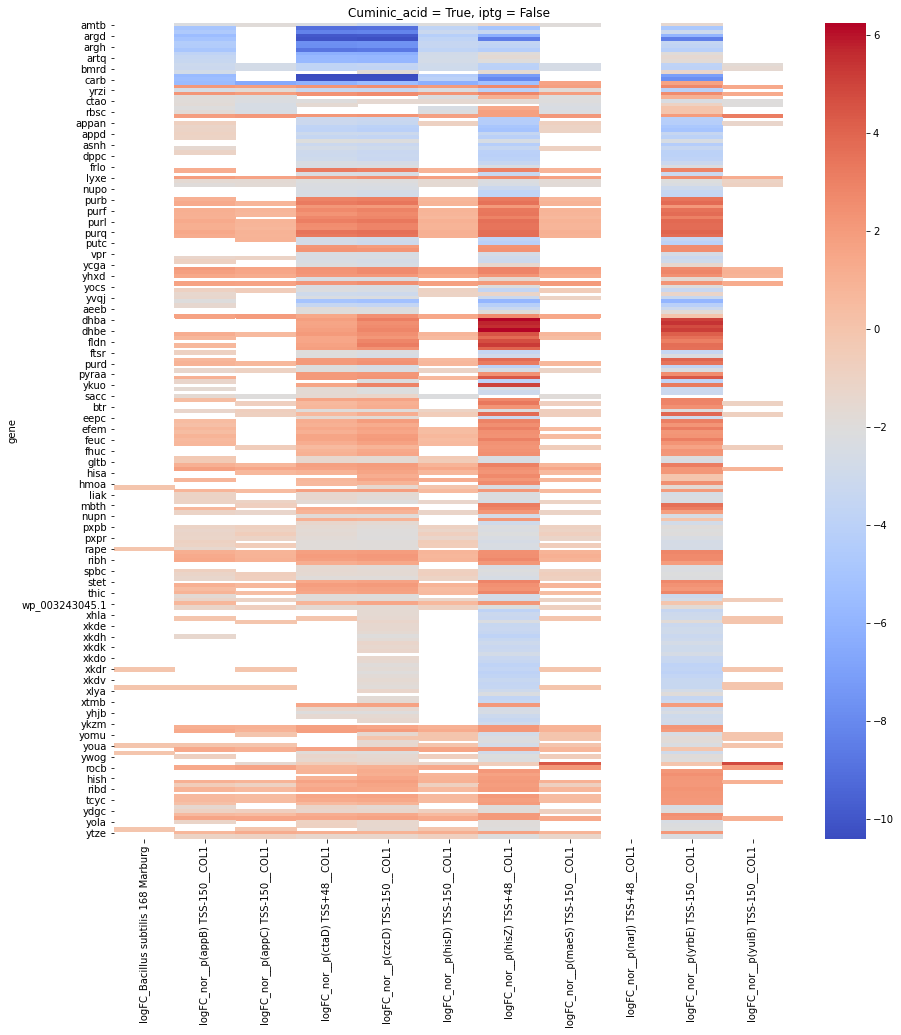

In [34]:
df3=df2a.set_index('gene')
plt.figure(figsize=(15,15))
sns.heatmap(df3, cmap="coolwarm").set(title="Cuminic_acid = True, iptg = False")

[Text(0.5, 1.0, 'Cuminic_acid = False, iptg = True')]

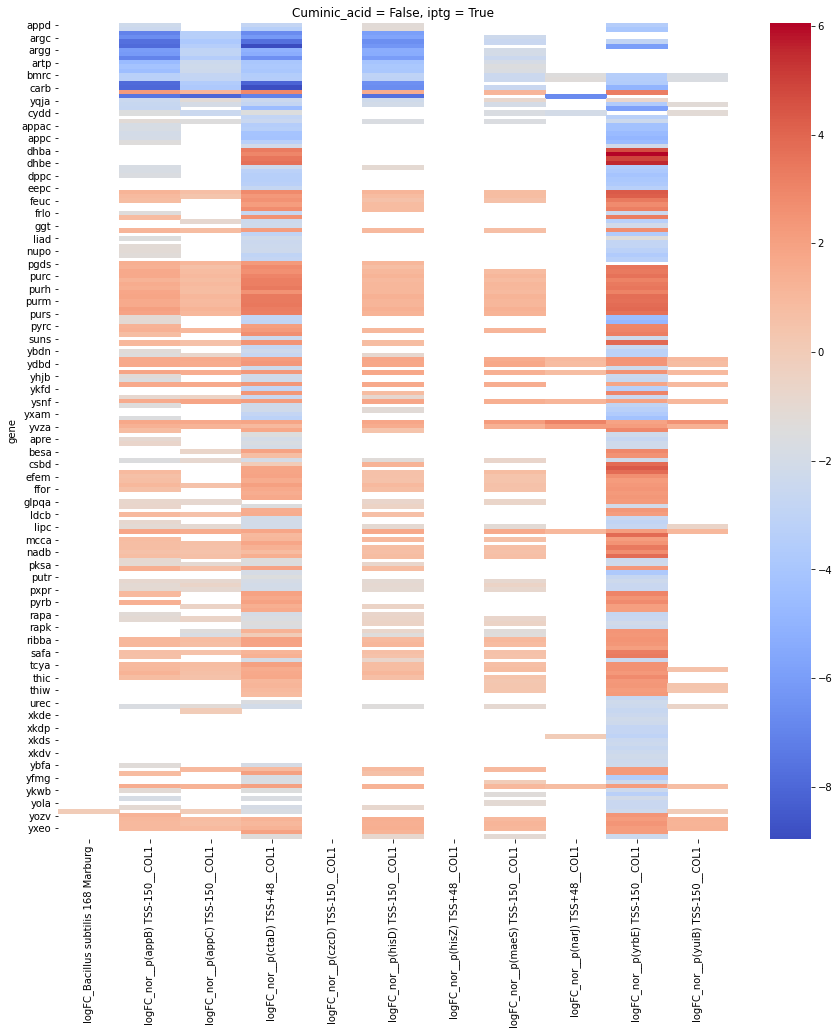

In [35]:
df3=df2b.set_index('gene')
plt.figure(figsize=(15,15))
sns.heatmap(df3, cmap="coolwarm").set(title="Cuminic_acid = False, iptg = True")

[Text(0.5, 1.0, 'Cuminic_acid = True, iptg = True')]

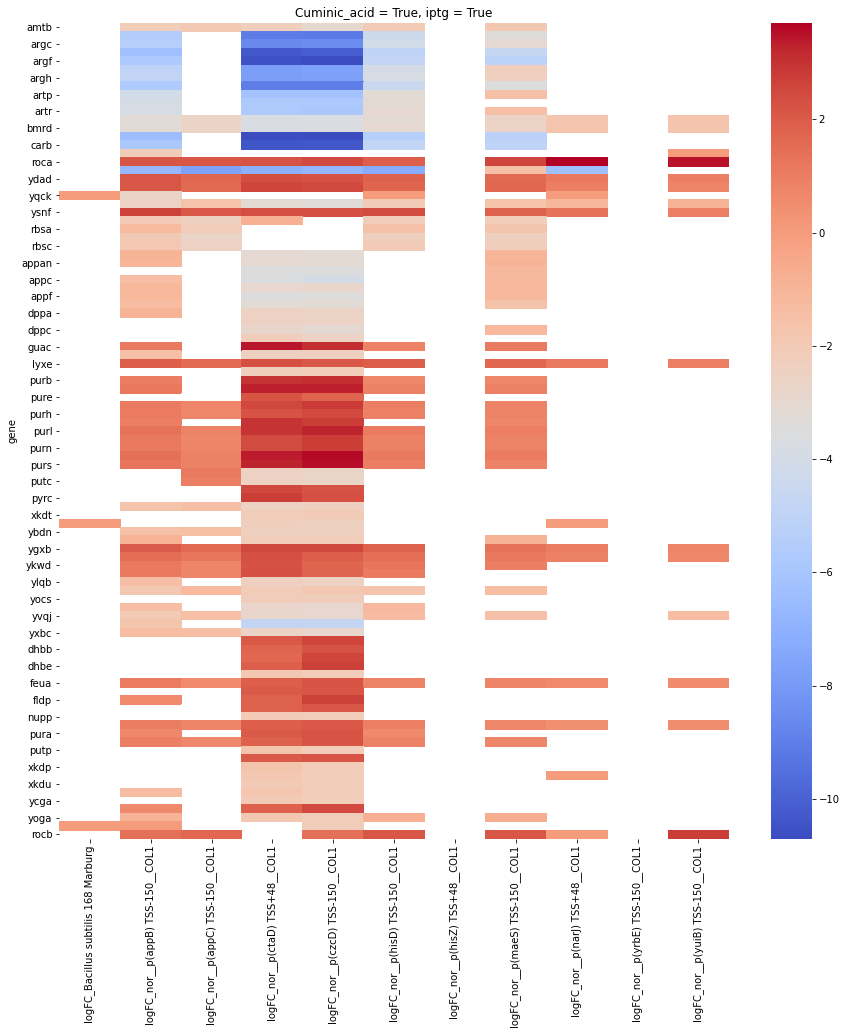

In [36]:
df3=df2c.set_index('gene')
plt.figure(figsize=(15,15))
sns.heatmap(df3, cmap="coolwarm").set(title="Cuminic_acid = True, iptg = True")

In [13]:
# Remove all filters from (1). Create another heatmap where the rows are only the genes used in the circuit and columns are samples
genes_in_use = ['appB', 'appC', 'ctaD', 'czcD', 'hisD', 'hisZ', 'maeS', 'narJ', 'yrbE', 'yuiB']
df2_no_filter = df[(df['gene'].isin([x.lower() for x in genes_in_use]))]
df2_no_filter.head(2)

,gene,FDR_Bacillus subtilis 168 Marburg,FDR_nor__p(appB) TSS-150__COL1,FDR_nor__p(appC) TSS-150__COL1,FDR_nor__p(ctaD) TSS+48__COL1,FDR_nor__p(czcD) TSS-150__COL1,FDR_nor__p(hisD) TSS-150__COL1,FDR_nor__p(hisZ) TSS+48__COL1,FDR_nor__p(maeS) TSS-150__COL1,FDR_nor__p(narJ) TSS+48__COL1,FDR_nor__p(yrbE) TSS-150__COL1,FDR_nor__p(yuiB) TSS-150__COL1,cuminic_acid,iptg,logFC_Bacillus subtilis 168 Marburg,logFC_nor__p(appB) TSS-150__COL1,logFC_nor__p(appC) TSS-150__COL1,logFC_nor__p(ctaD) TSS+48__COL1,logFC_nor__p(czcD) TSS-150__COL1,logFC_nor__p(hisD) TSS-150__COL1,logFC_nor__p(hisZ) TSS+48__COL1,logFC_nor__p(maeS) TSS-150__COL1,logFC_nor__p(narJ) TSS+48__COL1,logFC_nor__p(yrbE) TSS-150__COL1,logFC_nor__p(yuiB) TSS-150__COL1
80,appb,0.99991,0.081912,0.273230,2.769805e-11,3.578473e-12,0.182328,NaN,0.022561,0.380030,NaN,0.468211,True,True,-0.029917,-0.877377,-0.711524,-3.479379,-3.491540,-0.819629,NaN,-1.146679,-0.642014,NaN,-0.640183
81,appc,0.99991,0.005582,0.116241,2.198805e-11,1.970917e-13,0.061626,NaN,0.016528,0.169888,NaN,0.244122,True,True,0.173013,-1.368792,-0.972694,-3.609728,-3.900692,-1.109396,NaN,-1.232970,-0.906372,NaN,-0.896090


In [14]:
df3_no_filter=df2_no_filter.set_index('gene')
df3_no_filter.drop_duplicates(inplace=True)
df3_no_filter=df3_no_filter.drop(columns=['FDR_'+c for c in circuits], axis=1)
df3_no_filter = df3_no_filter[df3_no_filter.columns.drop(list(df.filter(regex='flagedgeRremoved_')))]
df3_no_filter = df3_no_filter[df3_no_filter.columns.drop(list(df.filter(regex='nlogFDR_')))]

In [15]:
df3a_no_filter=df3_no_filter[(df3_no_filter['cuminic_acid']==False) & (df3_no_filter['iptg']==False)]
df3a_no_filter=df3a_no_filter.drop(columns=['cuminic_acid', 'iptg'], axis=1)

df3b_no_filter=df3_no_filter[(df3_no_filter['cuminic_acid']==True) & (df3_no_filter['iptg']==False)]
df3b_no_filter=df3b_no_filter.drop(columns=['cuminic_acid', 'iptg'], axis=1)

df3c_no_filter=df3_no_filter[(df3_no_filter['cuminic_acid']==False) & (df3_no_filter['iptg']==True)]
df3c_no_filter=df3c_no_filter.drop(columns=['cuminic_acid', 'iptg'], axis=1)

df3d_no_filter=df3_no_filter[(df3_no_filter['cuminic_acid']==True) & (df3_no_filter['iptg']==True)]
df3d_no_filter=df3d_no_filter.drop(columns=['cuminic_acid', 'iptg'], axis=1)

<AxesSubplot:title={'center':'cuminic_acid=False, iptg=False'}, xlabel='gene', ylabel='logFC'>

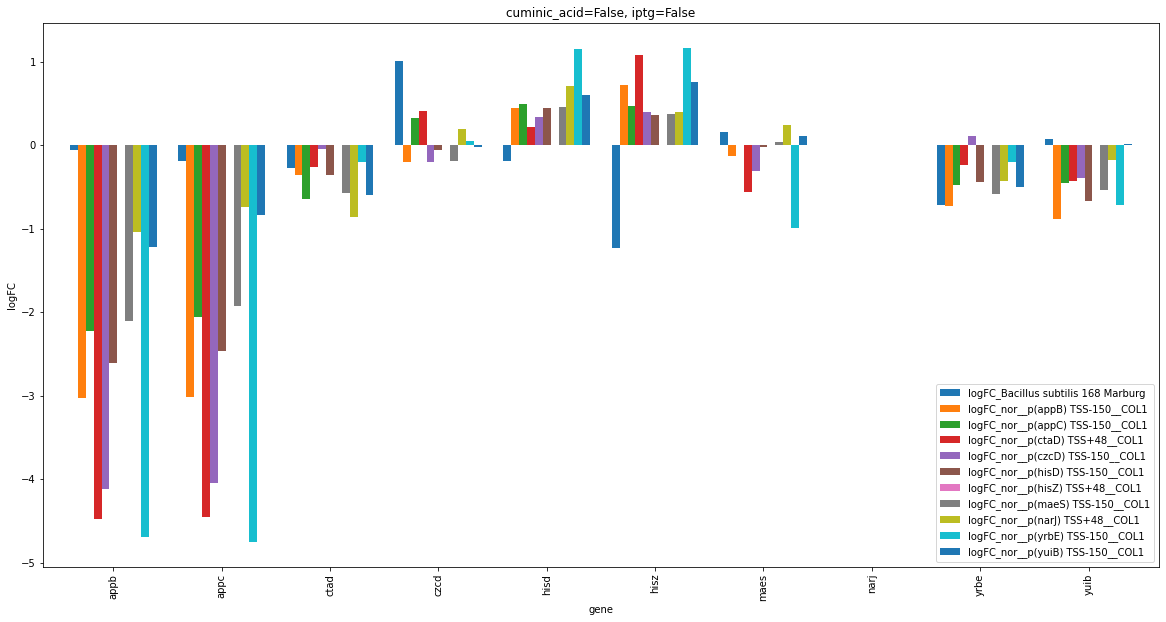

In [16]:
df3a_no_filter.plot(title="cuminic_acid=False, iptg=False", ylabel="logFC", figsize=(20,10), y=df3a_no_filter.columns.tolist(), kind="bar", width=0.8)

<AxesSubplot:title={'center':'cuminic_acid=True, iptg=False'}, xlabel='gene', ylabel='logFC'>

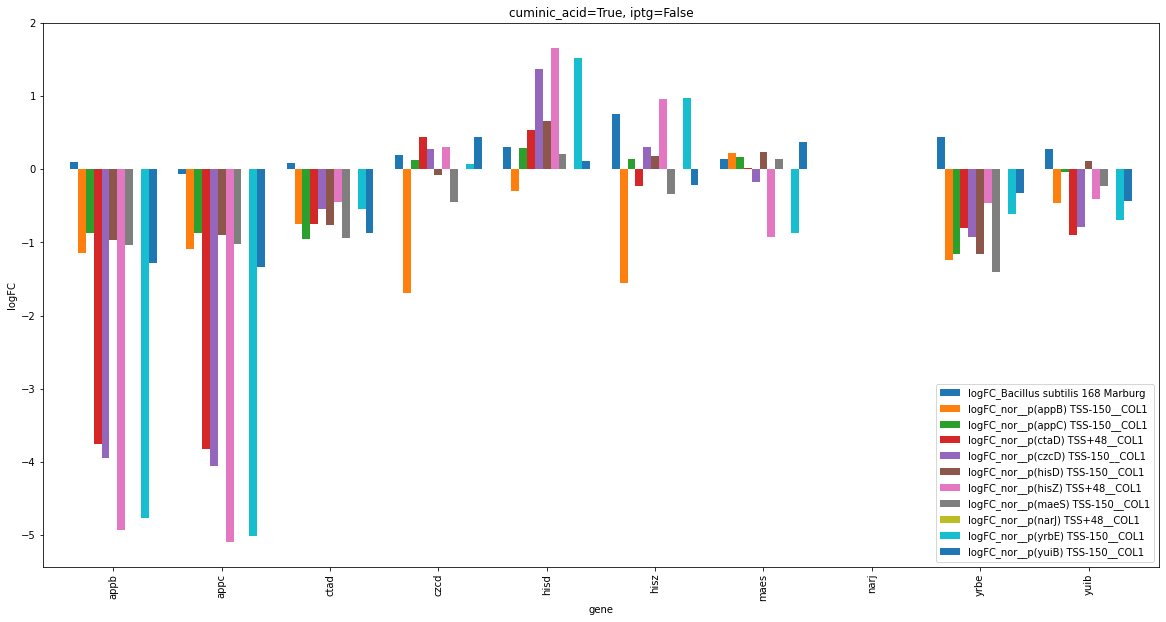

In [17]:
df3b_no_filter.plot(title="cuminic_acid=True, iptg=False", ylabel="logFC", figsize=(20,10), y=df3b_no_filter.columns.tolist(), kind="bar", width=0.8)

<AxesSubplot:title={'center':'cuminic_acid=False, iptg=True'}, xlabel='gene', ylabel='logFC'>

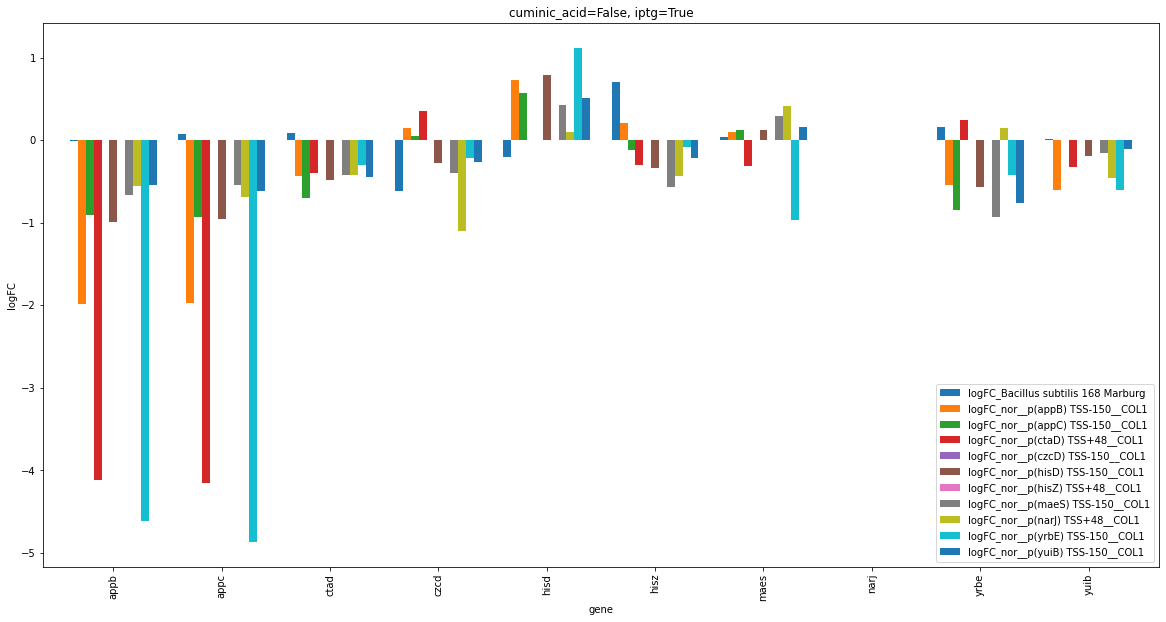

In [18]:
df3c_no_filter.plot(title="cuminic_acid=False, iptg=True", ylabel="logFC", figsize=(20,10), y=df3c_no_filter.columns.tolist(), kind="bar", width=0.8)

<AxesSubplot:title={'center':'cuminic_acid=True, iptg=True'}, xlabel='gene', ylabel='logFC'>

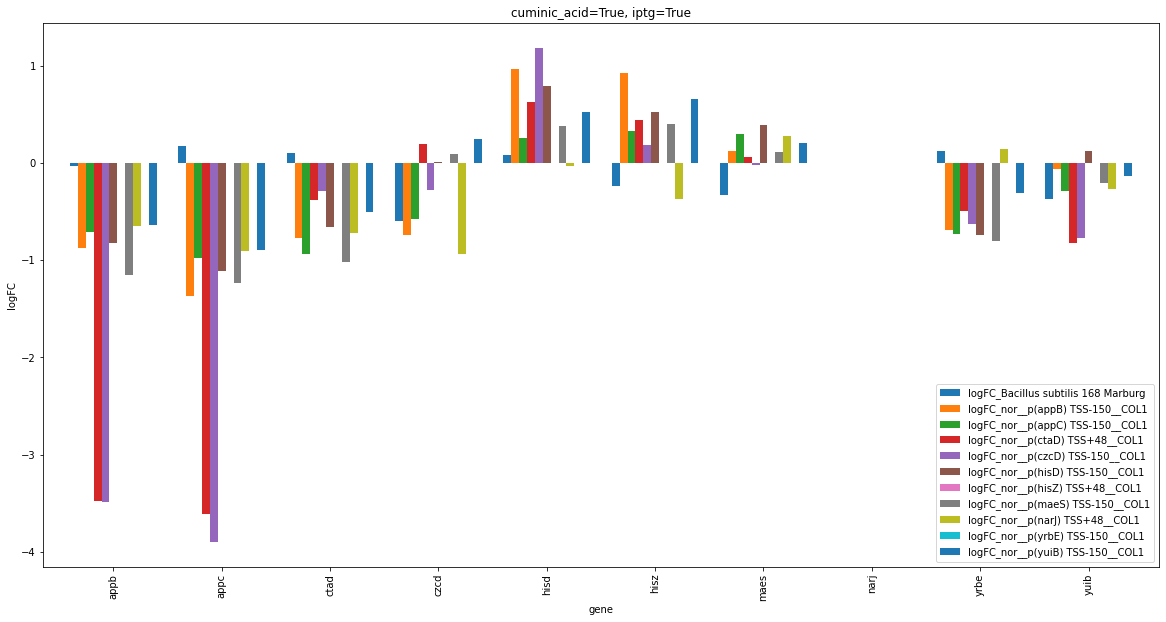

In [19]:
df3d_no_filter.plot(title="cuminic_acid=True, iptg=True", ylabel="logFC", figsize=(20,10), y=df3d_no_filter.columns.tolist(), kind="bar", width=0.8)

In [20]:
# Do the genetic parts follow the logic we expect at the RNA level